<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load modules and Set constants

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, cv2, glob, zipfile
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
WIDTH, HEIGHT = 256, 256

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Search',
    'number' : '4',
    'date' : '09-13-2021',
    'description' : 'Visualization similar trajectories'
    }

ROOT_DIR = os.path.join('/content')

IMAGE_DIR = os.path.join(ROOT_DIR, 'Image_Files')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', 'PiLab', 'Experiment')
DATA_DIR = os.path.join(EXPERIMENT_DIR, 'Data')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Results"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'IMAGE_DIR:       {IMAGE_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')
print(f'CURR_RESULT_DIR: {CURR_RESULT_DIR}')

ROOT_DIR:        /content
BITMAP_DIR:      /content/Bitmap
IMAGE_DIR:       /content/Image_Files
EXPERIMENT_DIR:  /content/drive/MyDrive/1_University/PiLab/Experiment
DATA_DIR:        /content/drive/MyDrive/1_University/PiLab/Experiment/Data
RESULT_DIR:      /content/drive/MyDrive/1_University/PiLab/Experiment/Results
CURR_RESULT_DIR: /content/drive/MyDrive/1_University/PiLab/Experiment/Results/Trajectory_Clusetring_40_09-13-2021_Results


# Load Data

In [ ]:
os.chdir(ROOT_DIR)
zipfile.ZipFile(DATA_DIR + "/Image_Files.zip").extractall(ROOT_DIR)

In [ ]:
os.chdir(IMAGE_DIR)
file_names = sorted(glob.glob('*png'))

In [ ]:
groups = [['Geolife_trajectory218.png', 'Geolife_trajectory220.png', 'Geolife_trajectory189.png', 'Geolife_trajectory242.png', 'Geolife_trajectory188.png', 'Geolife_trajectory231.png', 'Geolife_trajectory195.png', 'Geolife_trajectory225.png', 'Geolife_trajectory204.png', 'Geolife_trajectory223.png'],
['Geolife_trajectory357.png', 'Geolife_trajectory282.png', 'Geolife_trajectory392.png', 'Geolife_trajectory361.png', 'Geolife_trajectory395.png', 'Geolife_trajectory344.png', 'Geolife_trajectory388.png', 'Geolife_trajectory266.png', 'Geolife_trajectory394.png', 'Geolife_trajectory279.png'],
['Geolife_trajectory507.png', 'Geolife_trajectory438.png', 'Geolife_trajectory2251.png', 'Geolife_trajectory9734.png', 'Geolife_trajectory5077.png', 'Geolife_trajectory835.png', 'Geolife_trajectory13387.png', 'Geolife_trajectory7134.png', 'Geolife_trajectory358.png', 'Geolife_trajectory456.png'],
['Geolife_trajectory1434.png', 'Geolife_trajectory1428.png', 'Geolife_trajectory6487.png', 'Geolife_trajectory4376.png', 'Geolife_trajectory6194.png', 'Geolife_trajectory10208.png', 'Geolife_trajectory4975.png', 'Geolife_trajectory13912.png', 'Geolife_trajectory2296.png', 'Geolife_trajectory4550.png'],
['Geolife_trajectory1875.png', 'Geolife_trajectory1913.png', 'Geolife_trajectory1883.png', 'Geolife_trajectory1845.png', 'Geolife_trajectory1957.png', 'Geolife_trajectory1853.png', 'Geolife_trajectory6990.png', 'Geolife_trajectory5114.png', 'Geolife_trajectory8802.png', 'Geolife_trajectory5599.png'],
['Geolife_trajectory3676.png', 'Geolife_trajectory3881.png', 'Geolife_trajectory3686.png', 'Geolife_trajectory3818.png', 'Geolife_trajectory3720.png', 'Geolife_trajectory3669.png', 'Geolife_trajectory3838.png', 'Geolife_trajectory3856.png', 'Geolife_trajectory3790.png', 'Geolife_trajectory3866.png']]

In [ ]:
def plot_overlap(images, overlap, file_name):
    group_images = [ ]
    os.chdir(IMAGE_DIR)
    for name in images:
        group_images.append(cv2.imread(name, cv2.IMREAD_GRAYSCALE))

    result = [[0 for _ in range(WIDTH)] for _ in range(HEIGHT)]
    for img in group_images:
        for row in range(HEIGHT):
            for col in range(WIDTH):
                if (img[row][col]):
                    result[row][col] += overlap
                    result[row][col] = min(result[row][col], 255)
                        
        
    os.chdir(CURR_RESULT_DIR)

    plt.gray()
    plt.imshow(result)
    plt.savefig(file_name, dpi = 100)
    plt.show()

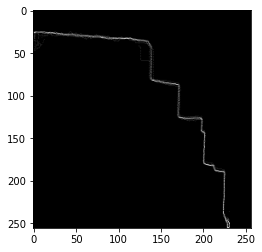

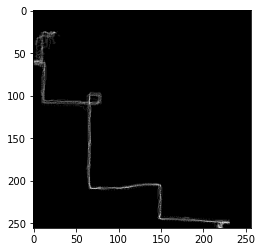

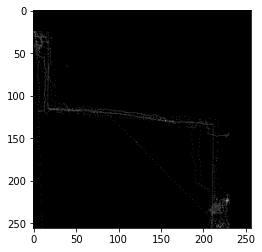

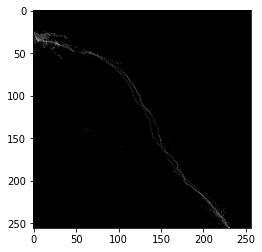

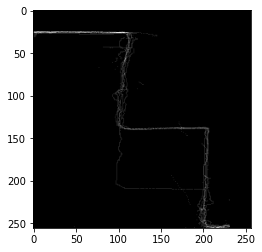

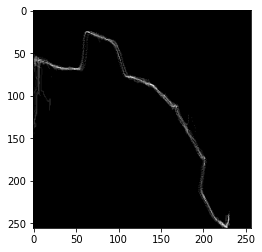

In [ ]:
for idx, group in enumerate(groups):
    plot_overlap(group, 20, f'Result_20_{idx}.png')

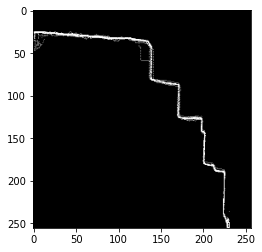

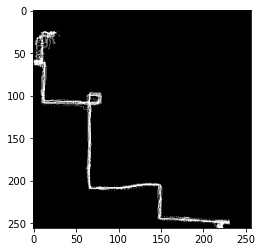

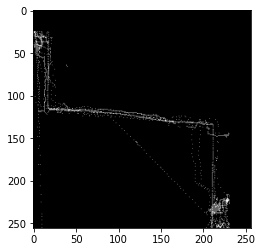

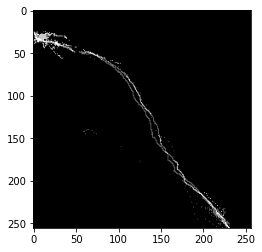

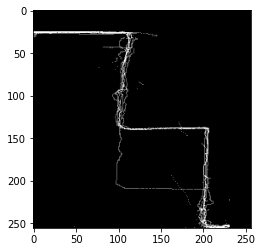

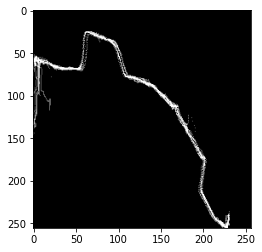

In [ ]:
for idx, group in enumerate(groups):
    plot_overlap(group, 100, f'Result_100_{idx}.png')